# Logistic Regression

In [5]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

In [6]:
tweets = pd.read_pickle("english_sentiment_with_confidence.pkl")
tweets.columns = ['text_clean', 'iaa']

In [7]:
threshold = 0.90 # Threshold
lables = tweets['iaa'] < threshold
tweets['difficult'] = tweets['iaa'] < threshold
print("There are " + str(tweets['difficult'].sum()) + " hard tweets in the current dataset." 
          " Which is " +  str(round(tweets['difficult'].sum()/len(tweets), ndigits = 3)*100) + "% of all tweets in the dataset")

There are 13963 hard tweets in the current dataset. Which is 47.8% of all tweets in the dataset


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5baef210>]],
      dtype=object)

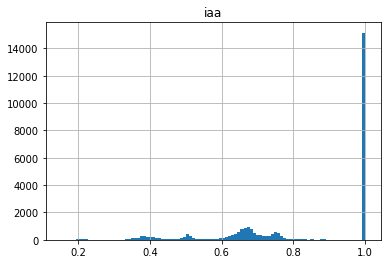

In [8]:
tweets.hist(bins=100)

In [11]:
import pickle
with open("embedded_random_english.pkl", 'rb') as f: 
    imported_tweets = pickle.load(f)
embedded_tweets = np.concatenate(imported_tweets)

In [12]:
embedded_tweets.shape

(29206, 512)

## Model -- Logestic regression with weights



In [13]:
total = len(tweets)

pos = tweets['difficult'].sum()
neg = total - pos

In [14]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(embedded_tweets, tweets['difficult'].to_numpy(), 
                                                    test_size=0.2, random_state=42)# change to scaled_features to use pca

In [16]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Fit it to the data
log_reg = LogisticRegression(penalty="l1", C=0.5, solver="liblinear", class_weight=class_weight).fit(X_train, y_train)

# Print the tuned parameters and score
# Predict labels 
y_predicted = log_reg.predict(X_test)
# Predict probability
y_probab = log_reg.predict_proba(X_test)

print("Testing the testing dataset accuracy...")
print(classification_report(y_test, y_predicted))

Testing the testing dataset accuracy...
              precision    recall  f1-score   support

       False       0.70      0.71      0.71      3029
        True       0.68      0.68      0.68      2813

    accuracy                           0.69      5842
   macro avg       0.69      0.69      0.69      5842
weighted avg       0.69      0.69      0.69      5842



In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

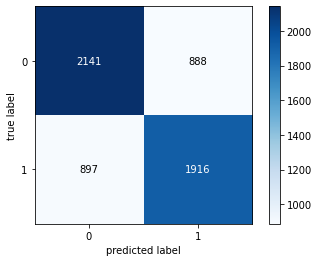

False Negative Rate 0.15354330708661418


In [18]:
cf = confusion_matrix(y_test, y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cf, colorbar=True)
plt.show()
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_predicted), labels=[0, 1]).ravel()
tot = cf.sum()
tot = tn+tp+fp+fn
print('False Negative Rate', fn/tot)

In [19]:
from sklearn.metrics import fbeta_score

# 2.0 more weight to recall less to precision
print('fbeta 2')
print(fbeta_score(y_test, y_predicted, beta=2))

fbeta 2
0.6815594763801934


#Precision Recall

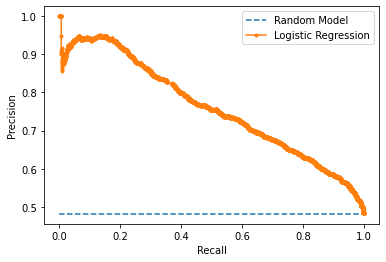

In [20]:
# PR curve for XGBoost regression model
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probab[:,1])
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='Random Model')
pyplot.plot(recall, precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [21]:
y_probab

array([[0.58303588, 0.41696412],
       [0.87317989, 0.12682011],
       [0.04794914, 0.95205086],
       ...,
       [0.40987273, 0.59012727],
       [0.65405974, 0.34594026],
       [0.66049909, 0.33950091]])

# Export results

In [22]:

#df = pd.DataFrame({"Truth":y_test, "Pred":y_predicted, "Prob":y_probab[:,1]})

In [23]:
#df.to_csv("/content/drive/MyDrive/Thesis/MLAlgorithms/Logistic Regression/resultsLREnglish.csv")

In [24]:
#df